In [6]:
#project 2
from sklearn.cluster import KMeans
import pandas as pd
from pathlib import Path
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt


In [7]:
#Read CSV
Path="Resources/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv"
price_df= pd.read_csv(Path)
price_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,232527.0,...,1124579.0,1119261.0,1114733.0,1112570.0,1113554.0,1108906.0,1104331.0,1098915.0,1089614.0,1090168.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,208780.0,...,488778.0,489319.0,490664.0,492714.0,495483.0,498200.0,500780.0,503294.0,505577.0,508007.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,184917.0,...,913735.0,916274.0,916593.0,920113.0,931353.0,934916.0,934687.0,930893.0,934775.0,945772.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,199929.0,...,336901.0,337728.0,338452.0,339876.0,341435.0,343897.0,346910.0,351188.0,355336.0,360190.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,281068.0,...,629766.0,629807.0,630985.0,632529.0,635442.0,638288.0,641416.0,644506.0,647307.0,650905.0


In [8]:
#Filter dataframe
price_df=price_df.drop(columns=["RegionID","SizeRank","RegionName","RegionType","StateName","Metro"]).copy()
price_df

,State,City,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
0,NY,New York,New York County,232527.0,231079.0,231156.0,231131.0,231660.0,232303.0,232189.0,...,1124579.0,1119261.0,1114733.0,1112570.0,1113554.0,1108906.0,1104331.0,1098915.0,1089614.0,1090168.0
1,IL,Chicago,Cook County,208780.0,208625.0,208220.0,208086.0,207527.0,207709.0,207498.0,...,488778.0,489319.0,490664.0,492714.0,495483.0,498200.0,500780.0,503294.0,505577.0,508007.0
2,NY,New York,New York County,184917.0,184955.0,185058.0,185717.0,186675.0,187460.0,187721.0,...,913735.0,916274.0,916593.0,920113.0,931353.0,934916.0,934687.0,930893.0,934775.0,945772.0
3,TX,Katy,Harris County,199929.0,200176.0,199980.0,198794.0,197659.0,196995.0,197755.0,...,336901.0,337728.0,338452.0,339876.0,341435.0,343897.0,346910.0,351188.0,355336.0,360190.0
4,IL,Chicago,Cook County,281068.0,280811.0,280293.0,280152.0,279477.0,279565.0,279073.0,...,629766.0,629807.0,630985.0,632529.0,635442.0,638288.0,641416.0,644506.0,647307.0,650905.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30338,OR,Central Point,Jackson County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147808.0,149015.0,149286.0,149493.0,149872.0,151352.0,152961.0,156051.0,160039.0,164643.0
30339,TX,Texarkana,Bowie County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49084.0,48557.0,48263.0,48361.0,48416.0,48625.0,49064.0,49603.0,50003.0,50320.0
30340,MA,Groton,Middlesex County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,387810.0,387823.0,387806.0,388207.0,389813.0,391532.0,393895.0,393194.0,392171.0,393842.0
30341,LA,Choudrant,Lincoln Parish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200140.0,199806.0,199449.0,199659.0,199228.0,198112.0,196824.0,196220.0,195117.0,192702.0


In [9]:
bayarea_price_df = price_df[price_df["CountyName"].isin(["San Francisco County","San Mateo County","Santa Clara County","Alameda County","Contra Costa County","Marin County", "Sonoma County"])].dropna()
bayarea_price_df

,State,City,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
13,CA,San Francisco,San Francisco County,333727.0,332205.0,331788.0,330713.0,330535.0,330277.0,330447.0,...,1217984.0,1210221.0,1204887.0,1201422.0,1198273.0,1185486.0,1174127.0,1158873.0,1147199.0,1132611.0
86,CA,Alameda,Alameda County,183651.0,182684.0,182409.0,181685.0,181500.0,180861.0,180260.0,...,1076034.0,1075570.0,1077038.0,1086790.0,1097824.0,1113689.0,1128931.0,1140118.0,1146929.0,1159571.0
92,CA,San Francisco,San Francisco County,285314.0,283786.0,282878.0,281548.0,280920.0,280286.0,279710.0,...,1613069.0,1604729.0,1598217.0,1598760.0,1598630.0,1584055.0,1571072.0,1557327.0,1551159.0,1540788.0
227,CA,Fremont,Alameda County,202048.0,201616.0,201610.0,201552.0,201948.0,202098.0,202230.0,...,1064742.0,1064136.0,1069105.0,1082096.0,1095959.0,1112354.0,1129735.0,1144798.0,1155304.0,1169765.0
270,CA,San Jose,Santa Clara County,199719.0,199149.0,198988.0,198670.0,198752.0,198886.0,199087.0,...,989819.0,990213.0,993742.0,1008738.0,1019813.0,1033190.0,1043574.0,1054422.0,1059563.0,1061644.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,CA,San Quentin,Marin County,660013.0,655020.0,653387.0,650170.0,648756.0,650596.0,652024.0,...,1205480.0,1189553.0,1178215.0,1172621.0,1157268.0,1135241.0,1114668.0,1106883.0,1105517.0,1093936.0
25789,CA,Tomales,Marin County,361426.0,361838.0,363166.0,365012.0,367697.0,371855.0,375624.0,...,851142.0,855248.0,862179.0,878421.0,894595.0,913852.0,925617.0,937562.0,948524.0,950917.0
26545,CA,Dillon Beach,Marin County,425738.0,423289.0,424159.0,422953.0,425435.0,424763.0,424808.0,...,943496.0,940175.0,942274.0,959321.0,971260.0,983792.0,992155.0,1011505.0,1034734.0,1057952.0
26799,CA,East Foothills,Santa Clara County,306188.0,305729.0,307095.0,308975.0,310864.0,310383.0,309181.0,...,1501630.0,1500622.0,1511586.0,1535741.0,1551543.0,1562483.0,1576453.0,1601002.0,1625908.0,1646494.0


In [10]:
#extract only CA
#ca_price_df=price_df[price_df["State"]=="CA"].dropna()
#ca_price_df

In [12]:
#merge rows based on cities and average the prices
bayarea_price_df = bayarea_price_df.groupby("City").mean()
bayarea_price_df.head()

,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
City,,,,,,,,,,,,,,,,,,,,,
Alameda,205976.5,205057.0,204658.5,203799.0,203365.0,202690.5,202019.5,201599.5,201412.0,201588.0,...,1042890.5,1042391.5,1045308.5,1055554.5,1065870.5,1077678.5,1089846.0,1098396.5,1104088.0,1114772.5
Alamo,519268.0,515543.0,512075.0,504934.0,495856.0,489957.0,486082.0,488797.0,490679.0,495567.0,...,1872645.0,1874683.0,1891990.0,1925931.0,1966881.0,1996807.0,2022829.0,2044018.0,2077690.0,2112884.0
Albany,215162.0,213857.0,212882.0,211755.0,211241.0,210787.0,209754.0,209380.0,209665.0,210647.0,...,1105206.0,1107140.0,1118224.0,1133198.0,1148091.0,1161087.0,1174722.0,1184064.0,1189380.0,1201063.0
Antioch,135345.5,134862.5,134612.0,134150.0,133767.0,133363.5,132942.0,132948.0,133067.0,133289.5,...,482705.0,482344.5,483688.0,489214.0,495665.5,500070.5,503803.0,507494.0,514168.0,522110.0
Atherton,768920.0,768438.0,768815.0,768997.0,770878.0,774411.0,777961.0,783733.0,789826.0,798800.0,...,6530981.0,6482820.0,6477371.0,6532045.0,6523715.0,6559876.0,6548970.0,6586869.0,6557351.0,6542985.0


In [35]:
transposed_bayarea_price_df = bayarea_price_df.transpose()
yoy_percent_change=transposed_bayarea_price_df.pct_change()
yoy_percent_change_t=yoy_percent_change.transpose()
yoy_percent_change_t


,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,...,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28
City,,,,,,,,,,,,,,,,,,,,,
Alameda,NaN,-0.004464,-0.001943,-0.004200,-0.002130,-0.003317,-0.003310,-0.002079,-0.000930,0.000874,...,-0.002425,-0.000478,0.002798,0.009802,0.009773,0.011078,0.011290,0.007846,0.005182,0.009677
Alamo,NaN,-0.007174,-0.006727,-0.013945,-0.017979,-0.011897,-0.007909,0.005585,0.003850,0.009962,...,-0.001154,0.001088,0.009232,0.017939,0.021262,0.015215,0.013032,0.010475,0.016473,0.016939
Albany,NaN,-0.006065,-0.004559,-0.005294,-0.002427,-0.002149,-0.004901,-0.001783,0.001361,0.004684,...,0.001919,0.001750,0.010011,0.013391,0.013142,0.011320,0.011743,0.007953,0.004490,0.009823
Antioch,NaN,-0.003569,-0.001857,-0.003432,-0.002855,-0.003016,-0.003161,0.000045,0.000895,0.001672,...,0.000771,-0.000747,0.002785,0.011425,0.013187,0.008887,0.007464,0.007326,0.013151,0.015446
Atherton,NaN,-0.000627,0.000491,0.000237,0.002446,0.004583,0.004584,0.007419,0.007774,0.011362,...,-0.007796,-0.007374,-0.000841,0.008441,-0.001275,0.005543,-0.001663,0.005787,-0.004481,-0.002191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tomales,NaN,0.001140,0.003670,0.005083,0.007356,0.011308,0.010136,-0.000631,-0.010768,-0.008224,...,0.001849,0.004824,0.008104,0.018838,0.018413,0.021526,0.012874,0.012905,0.011692,0.002523
Union City,NaN,-0.003315,-0.001120,-0.002504,-0.000698,-0.001577,-0.001736,-0.000277,0.001412,0.004113,...,-0.001177,0.000020,0.006055,0.013491,0.014860,0.017047,0.017155,0.013933,0.009335,0.012365
Walnut Creek,NaN,-0.002793,-0.001359,-0.004134,-0.000013,-0.000133,0.004985,0.004655,0.005239,0.005236,...,-0.000483,0.001851,0.004398,0.013387,0.013823,0.010892,0.006666,0.005089,0.009755,0.010354


In [16]:
city_list=list(values_df.columns)
twentyfive_years=[]
twenty_years=[]
fifteen_years=[]
ten_years=[]
five_years=[]
one_year=[]
six_months=[]
three_months=[]
one_month=[]

for city in city_list:
    twentyfive_years.append((values_df[city][9]-values_df[city][0])/values_df[city][0])    
    twenty_years.append((values_df[city][9]-values_df[city][1])/values_df[city][1])    
    fifteen_years.append((values_df[city][9]-values_df[city][2])/values_df[city][2])        
    ten_years.append((values_df[city][9]-values_df[city][3])/values_df[city][3])
    five_years.append((values_df[city][9]-values_df[city][4])/values_df[city][4])    
    one_year.append((values_df[city][9]-values_df[city][5])/values_df[city][5])
    six_months.append((values_df[city][9]-values_df[city][6])/values_df[city][6])
    three_months.append((values_df[city][9]-values_df[city][7])/values_df[city][7])
    one_month.append((values_df[city][9]-values_df[city][8])/values_df[city][8])
#print (twentyfive_years,twenty_years,fifteen_years,ten_years,five_years,one_year,six_months,three_months,one_month)

In [17]:
#one month
one_month_array=np.array(one_month)
round_to_thousands_1m=np.around(one_month_array,4)
one_month_rounded=list(round_to_thousands_1m)

#three months 
three_months_array=np.array(three_months)
round_to_thousands_3m=np.around(three_months_array,4)
three_months_rounded=list(round_to_thousands_3m)

#six months
six_months_array=np.array(six_months)
round_to_thousands_6m=np.around(six_months_array,4)
six_months_rounded=list(round_to_thousands_6m)

#one year
one_year_array=np.array(one_year)
round_to_thousands_1=np.around(one_year_array,4)
one_year_rounded=list(round_to_thousands_1)

#five years
five_years_array=np.array(five_years)
round_to_thousands_5=np.around(five_years_array,4)
five_years_rounded=list(round_to_thousands_5)

#ten years
ten_years_array=np.array(ten_years)
round_to_thousands_10=np.around(ten_years_array,4)
ten_years_rounded=list(round_to_thousands_10)

#fifteen years
fifteen_years_array=np.array(fifteen_years)
round_to_thousands_15=np.around(fifteen_years_array,4)
fifteen_years_rounded=list(round_to_thousands_15)

#twenty years
twenty_years_array=np.array(twenty_years)
round_to_thousands_20=np.around(twenty_years_array,4)
twenty_years_rounded=list(round_to_thousands_20)

#twenty five years
twentyfive_years_array=np.array(twentyfive_years)
round_to_thousands_25=np.around(twentyfive_years_array,4)
twentyfive_years_rounded=list(round_to_thousands_25)

In [19]:
#pct_change of 0.25, 0.5, 1, 5, 10, 15, 20, 25 years in prices
index_names=["25_years","20_years","15_years","10_years","5_years","1_year","6_months","3_months","1_month"]
growth_df=pd.DataFrame(index=index_names)
for i in range(len(city_list)):
    growth_df[city_list[i]]=[twentyfive_years_rounded[i] , twenty_years_rounded[i] , fifteen_years_rounded[i] , ten_years_rounded[i] , five_years_rounded[i], one_year_rounded[i] , six_months_rounded[i] , three_months_rounded[i] , one_month_rounded[i]]

growth_df=growth_df.transpose()
growth_df.head()

,25_years,20_years,15_years,10_years,5_years,1_year,6_months,3_months,1_month
Alameda,4.3603,2.2732,0.9205,1.2283,0.3367,0.0617,0.0562,0.0245,0.0052
Alamo,3.0012,1.4061,0.2012,0.7868,0.1932,0.1274,0.0982,0.0405,0.0165
Albany,4.5278,2.2337,0.8445,1.1200,0.3148,0.0853,0.0636,0.0244,0.0045
Antioch,2.7989,1.6029,0.1567,1.1399,0.4461,0.0742,0.0630,0.0282,0.0132
Atherton,7.5280,2.6280,1.7140,1.9401,0.3762,0.0169,0.0123,-0.0004,-0.0045


## K-Mean's Approach by peek yaer (lower the impact of 2008 housing crisis by treating it as three cycles) 

In [36]:
yoy_price_list=[]
yoy_price_df=pd.DataFrame()
yoy_price_change_df=pd.DataFrame()
for i in range(1997,2022): 
    current_year=bayarea_price_df[f"{i}-01-31"]
    past_year=bayarea_price_df[f"{i-1}-01-31"]
    yoy_price_df[i]=current_year
    yoy_price_change_df[2021-i]=(current_year-past_year)/past_year


In [37]:
transpose_yoy_price_change_df=yoy_price_change_df.transpose()

In [38]:
# Find when the peek happened 
peek_df=pd.DataFrame()
peek_df["when"] = transpose_yoy_price_change_df.idxmax()
peek_df["pct_increase"]=transpose_yoy_price_change_df.max()
peek_df

,when,pct_increase
City,,
Alameda,7,0.221739
Alamo,16,0.232090
Albany,20,0.258082
Antioch,16,0.273254
Atherton,20,0.385081
...,...,...
Tomales,8,0.172736
Union City,7,0.292617
Walnut Creek,7,0.226172


In [39]:
#elbow method, find SSE
k_rng=range(1,13)
sse=[]
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(peek_df[["when","pct_increase"]])
    sse.append(km.inertia_)

C:\Users\Might\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


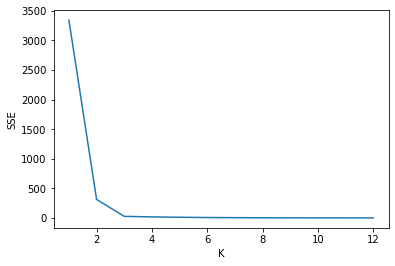

In [40]:
#plot elbow
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng,sse)

In [41]:
km_model = KMeans(n_clusters=3)
km_model

KMeans(n_clusters=3)

In [42]:
y_predictd=km_model.fit_predict(peek_df[["when","pct_increase"]])
#y_predictd
peek_df["cluster"]=y_predictd
peek_df

,when,pct_increase,cluster
City,,,
Alameda,7,0.221739,0
Alamo,16,0.232090,2
Albany,20,0.258082,1
Antioch,16,0.273254,2
Atherton,20,0.385081,1
...,...,...,...
Tomales,8,0.172736,0
Union City,7,0.292617,0
Walnut Creek,7,0.226172,0


,x,y
0,7.034483,0.253715
1,20.016393,0.272479
2,16.111111,0.221051


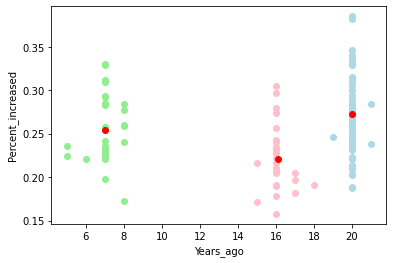

In [43]:
cluster_0=peek_df[peek_df.cluster==0]
cluster_1=peek_df[peek_df.cluster==1]
cluster_2=peek_df[peek_df.cluster==2]
plt.scatter(cluster_0.when,cluster_0.pct_increase, color="lightgreen")
plt.scatter(cluster_1.when,cluster_1.pct_increase, color="lightblue")
plt.scatter(cluster_2.when,cluster_2.pct_increase, color="pink")
plt.xlabel("Years_ago")
plt.ylabel("Percent_increased")
#find cluster centers for 
km_model.cluster_centers_
center_points_df=pd.DataFrame(km_model.cluster_centers_,columns=["x","y"])
display(center_points_df)
plt.scatter(center_points_df.x,center_points_df.y, color="red")

In [49]:
cluster_0=peek_df[peek_df["cluster"]==0]
cluster_0

,when,pct_increase,cluster
City,,,
Albany,20,0.258082,1
Atherton,20,0.385081,1
Belmont,20,0.262010,1
Bodega Bay,19,0.246665,1
Brisbane,21,0.238480,1
...,...,...,...
Sunnyvale,20,0.332686,1
Sunol,20,0.346767,1
Tiburon,20,0.231210,1


In [50]:
cluster_1=peek_df[peek_df["cluster"]==1]
cluster_1

,when,pct_increase,cluster
City,,,
Albany,20,0.258082,1
Atherton,20,0.385081,1
Belmont,20,0.262010,1
Bodega Bay,19,0.246665,1
Brisbane,21,0.238480,1
...,...,...,...
Sunnyvale,20,0.332686,1
Sunol,20,0.346767,1
Tiburon,20,0.231210,1


In [51]:
cluster_2=peek_df[peek_df["cluster"]==2]
cluster_2

,when,pct_increase,cluster
City,,,
Alamo,16,0.232090,2
Antioch,16,0.273254,2
Bethel Island,16,0.279905,2
Brentwood,16,0.297190,2
Cazadero,17,0.181770,2
Clayton,16,0.232887,2
Cloverdale,16,0.234431,2
Concord,16,0.241027,2
Danville,16,0.204314,2


In [47]:
#transpose_yoy_price_change_df=yoy_price_change_df.transpose()
#recent_growing_cities_df=transpose_yoy_price_change_df[past_growing_cities_percent_change.index]
#recent_growing_cities_df.hvplot.line()

In [195]:
#See the growth trend. 
#transpose_yoy_price_change_df=yoy_price_change_df.transpose()
#recent_growing_cities_df=transpose_yoy_price_change_df[recent_growing_cities_percent_change.index]
#recent_growing_cities_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [45]:
#transposed_group_ca_price_df=group_ca_price_df.transpose()
#transposed_group_ca_price_df

City,Acampo,Acton,Agoura Hills,Aguanga,Alameda,Alamo,Albany,Alhambra,Aliso Viejo,Alpine,...,Woodbridge,Woodlake,Woodland,Woody,Wrightwood,Yermo,Yorba Linda,Yountville,Yucaipa,Yucca Valley
1996-01-31,140984.0,189127.0,279318.0,107007.0,205976.5,519268.0,215162.0,174666.5,182835.0,248401.0,...,140499.0,83505.0,126744.000000,75013.0,117421.0,50982.0,277661.5,283982.0,134746.0,65755.0
1996-02-29,140052.0,189955.0,279063.0,107761.0,205057.0,515543.0,213857.0,174621.0,183226.0,248871.0,...,140168.0,83248.0,126282.000000,74805.0,116857.0,51029.0,278599.0,284941.0,134186.0,65547.0
1996-03-31,139210.0,190421.0,278997.0,107857.0,204658.5,512075.0,212882.0,174721.5,182878.0,248972.0,...,139632.0,83791.0,126200.666667,74747.0,116057.0,51277.0,278297.5,286029.0,133870.0,65313.0
1996-04-30,137199.0,192058.0,279112.0,108942.0,203799.0,504934.0,211755.0,174916.0,182359.0,249143.0,...,138935.0,84280.0,125808.000000,74867.0,114948.0,51597.0,278177.5,287480.0,133251.0,64784.0
1996-05-31,135968.0,192887.0,279307.0,108802.0,203365.0,495856.0,211241.0,175125.5,181621.0,249069.0,...,138525.0,84998.0,125683.333333,74980.0,113916.0,51736.0,277584.5,288283.0,132855.0,64365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31,621864.0,667301.0,937900.0,412951.0,1077678.5,1996807.0,1161087.0,740184.5,669872.0,705571.0,...,480273.0,217357.0,406224.000000,281229.0,339617.0,113084.0,932747.5,1052750.0,420137.0,248911.0
2020-11-30,635954.0,676827.0,945400.0,418102.0,1089846.0,2022829.0,1174722.0,745442.5,675925.0,715955.0,...,487889.0,220418.0,412813.666667,284578.0,343450.0,114160.0,943370.5,1064810.0,424590.0,252651.0
2020-12-31,651729.0,685957.0,952679.0,424011.0,1098396.5,2044018.0,1184064.0,750973.0,683473.0,725416.0,...,495108.0,223658.0,419063.333333,289189.0,348312.0,115908.0,955721.0,1078147.0,429971.0,257550.0
2021-01-31,669519.0,694479.0,959266.0,429866.0,1104088.0,2077690.0,1189380.0,755035.0,690731.0,735549.0,...,503072.0,227243.0,422658.000000,293217.0,353689.0,117595.0,967445.5,1090787.0,435339.0,262567.0


In [17]:
#percent_change of prices
#index_dates=["2006-01-31","2011-01-31","2016-01-31","2021-01-31"]
#percent_change_df=pd.DataFrame(transposed_group_ca_price_df, index=index_dates)
#percent_change_df

In [20]:
#city_list=list(percent_change_df.columns)
#five_years=[]
#ten_years=[]
#fifteen_years=[]
#for city in city_list:
    #five_years.append((percent_change_df[city][3]-percent_change_df[city][2])/percent_change_df[city][2])
    #ten_years.append((percent_change_df[city][3]-percent_change_df[city][1])/percent_change_df[city][1])
    #fifteen_years.append((percent_change_df[city][3]-percent_change_df[city][0])/percent_change_df[city][0])
#print (five_years,ten_years,fifteen_years)

[0.4841821047521298, 0.3131970365664106, 0.22769233525776308, 0.4233784982980358, 0.3366529077450078, 0.19318462434344955, 0.3147652141807783, 0.3458506495879303, 0.23464758622662016, 0.29586127192070666, 0.2784129979955815, 0.3901711566903789, 0.31576803459154723, 0.29763094779929206, 0.3730374433368026, 0.28489382053074724, 0.0313435666449357, 0.4461139947377525, 0.4938994407246224, 0.4367747673465228, 0.3544935507870297, 0.32972996950108374, 0.34129265060910036, 0.4138339088646989, 0.34726395951043704, 0.1672201105441518, 0.35188837392762057, 0.39365602632074187, 0.27828721332224426, 0.3761971560814081, 0.24623186203752945, 0.3547250777373304, 0.14072802308523158, 0.40685254812069777, 0.3510244371733651, 0.305073885022759, 0.37060154220401925, 0.4152187254281495, 0.6328501504248677, 0.3687341229601597, 0.42365223149108, 0.3780273918157303, 0.20477145779493003, 0.2932268120968578, 0.2791879966008468, 0.43713293952096743, 0.5774514974048683, 0.8069233910116534, 0.44938989936011975, 0.

In [12]:
#five years
#five_years_array=np.array(five_years)
#round_to_thousands_5=np.around(five_years_array,4)
#five_years_rounded=list(round_to_thousands_5)
#ten years
#ten_years_array=np.array(ten_years)
#round_to_thousands_10=np.around(ten_years_array,4)
#ten_years_rounded=list(round_to_thousands_10)
#fifteen years
#fifteen_years_array=np.array(fifteen_years)
#round_to_thousands_15=np.around(fifteen_years_array,4)
#fifteen_years_rounded=list(round_to_thousands_15)


In [13]:
#perchange of 5, 10, 15 years in prices
#index_names=["5_years","10_years","15_years"]
#growth_df=pd.DataFrame(index=index_names)
#for i in range(len(city_list)):
    #growth_df[city_list[i]]=[five_years_rounded[i] , ten_years_rounded[i] , fifteen_years_rounded[i]]
#save as csv
#growth_df=growth_df.transpose()
#growth_df